# Ejemplo extraido de la web scikit, adaptado al curso.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, svm

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data

In [6]:
y = iris.target

In [7]:
X = X[y != 0, :2]

In [8]:
y = y[y != 0]

In [9]:
n_sample = len(X)

In [10]:
np.random.seed(0)

In [11]:
order = np.random.permutation(n_sample)

In [12]:
X = X[order]

In [13]:
y = y[order].astype(np.float)

In [14]:
X_train = X[:int(.9 * n_sample)]

In [15]:
y_train = y[:int(.9 * n_sample)]

In [16]:
X_test = X[int(.9 * n_sample):]

In [17]:
y_test = y[int(.9 * n_sample):]

In [18]:
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)

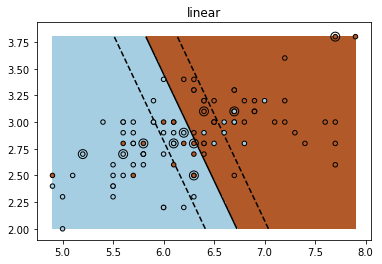

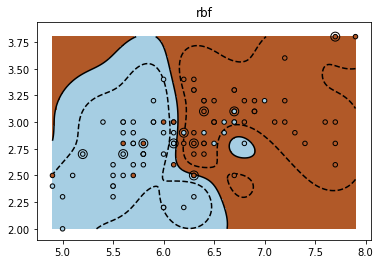

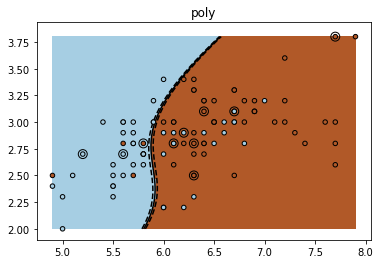

In [19]:
plt.show()